# Multiple Linear Regression 
## Bike Sharing 


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Importing dataset for Bike sharing 
data = pd.read_csv(r"C:\Users\003TKD744\Documents\assignment\bikesharing\day.csv")

# Display the first few rows of the dataframe
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the metadata 
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# notice all data types are intact
# check statistics on data columns now
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Check unique values and null values :


In [9]:
data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
#Lets fix some column names - more intuitive
data = data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# get some redundant columns off the data 

data.drop('casual', axis = 1, inplace = True)
data.drop('registered', axis = 1, inplace = True)
data.drop('instant', axis = 1, inplace = True)
data.drop('dteday', axis = 1, inplace = True)
data.head(5)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


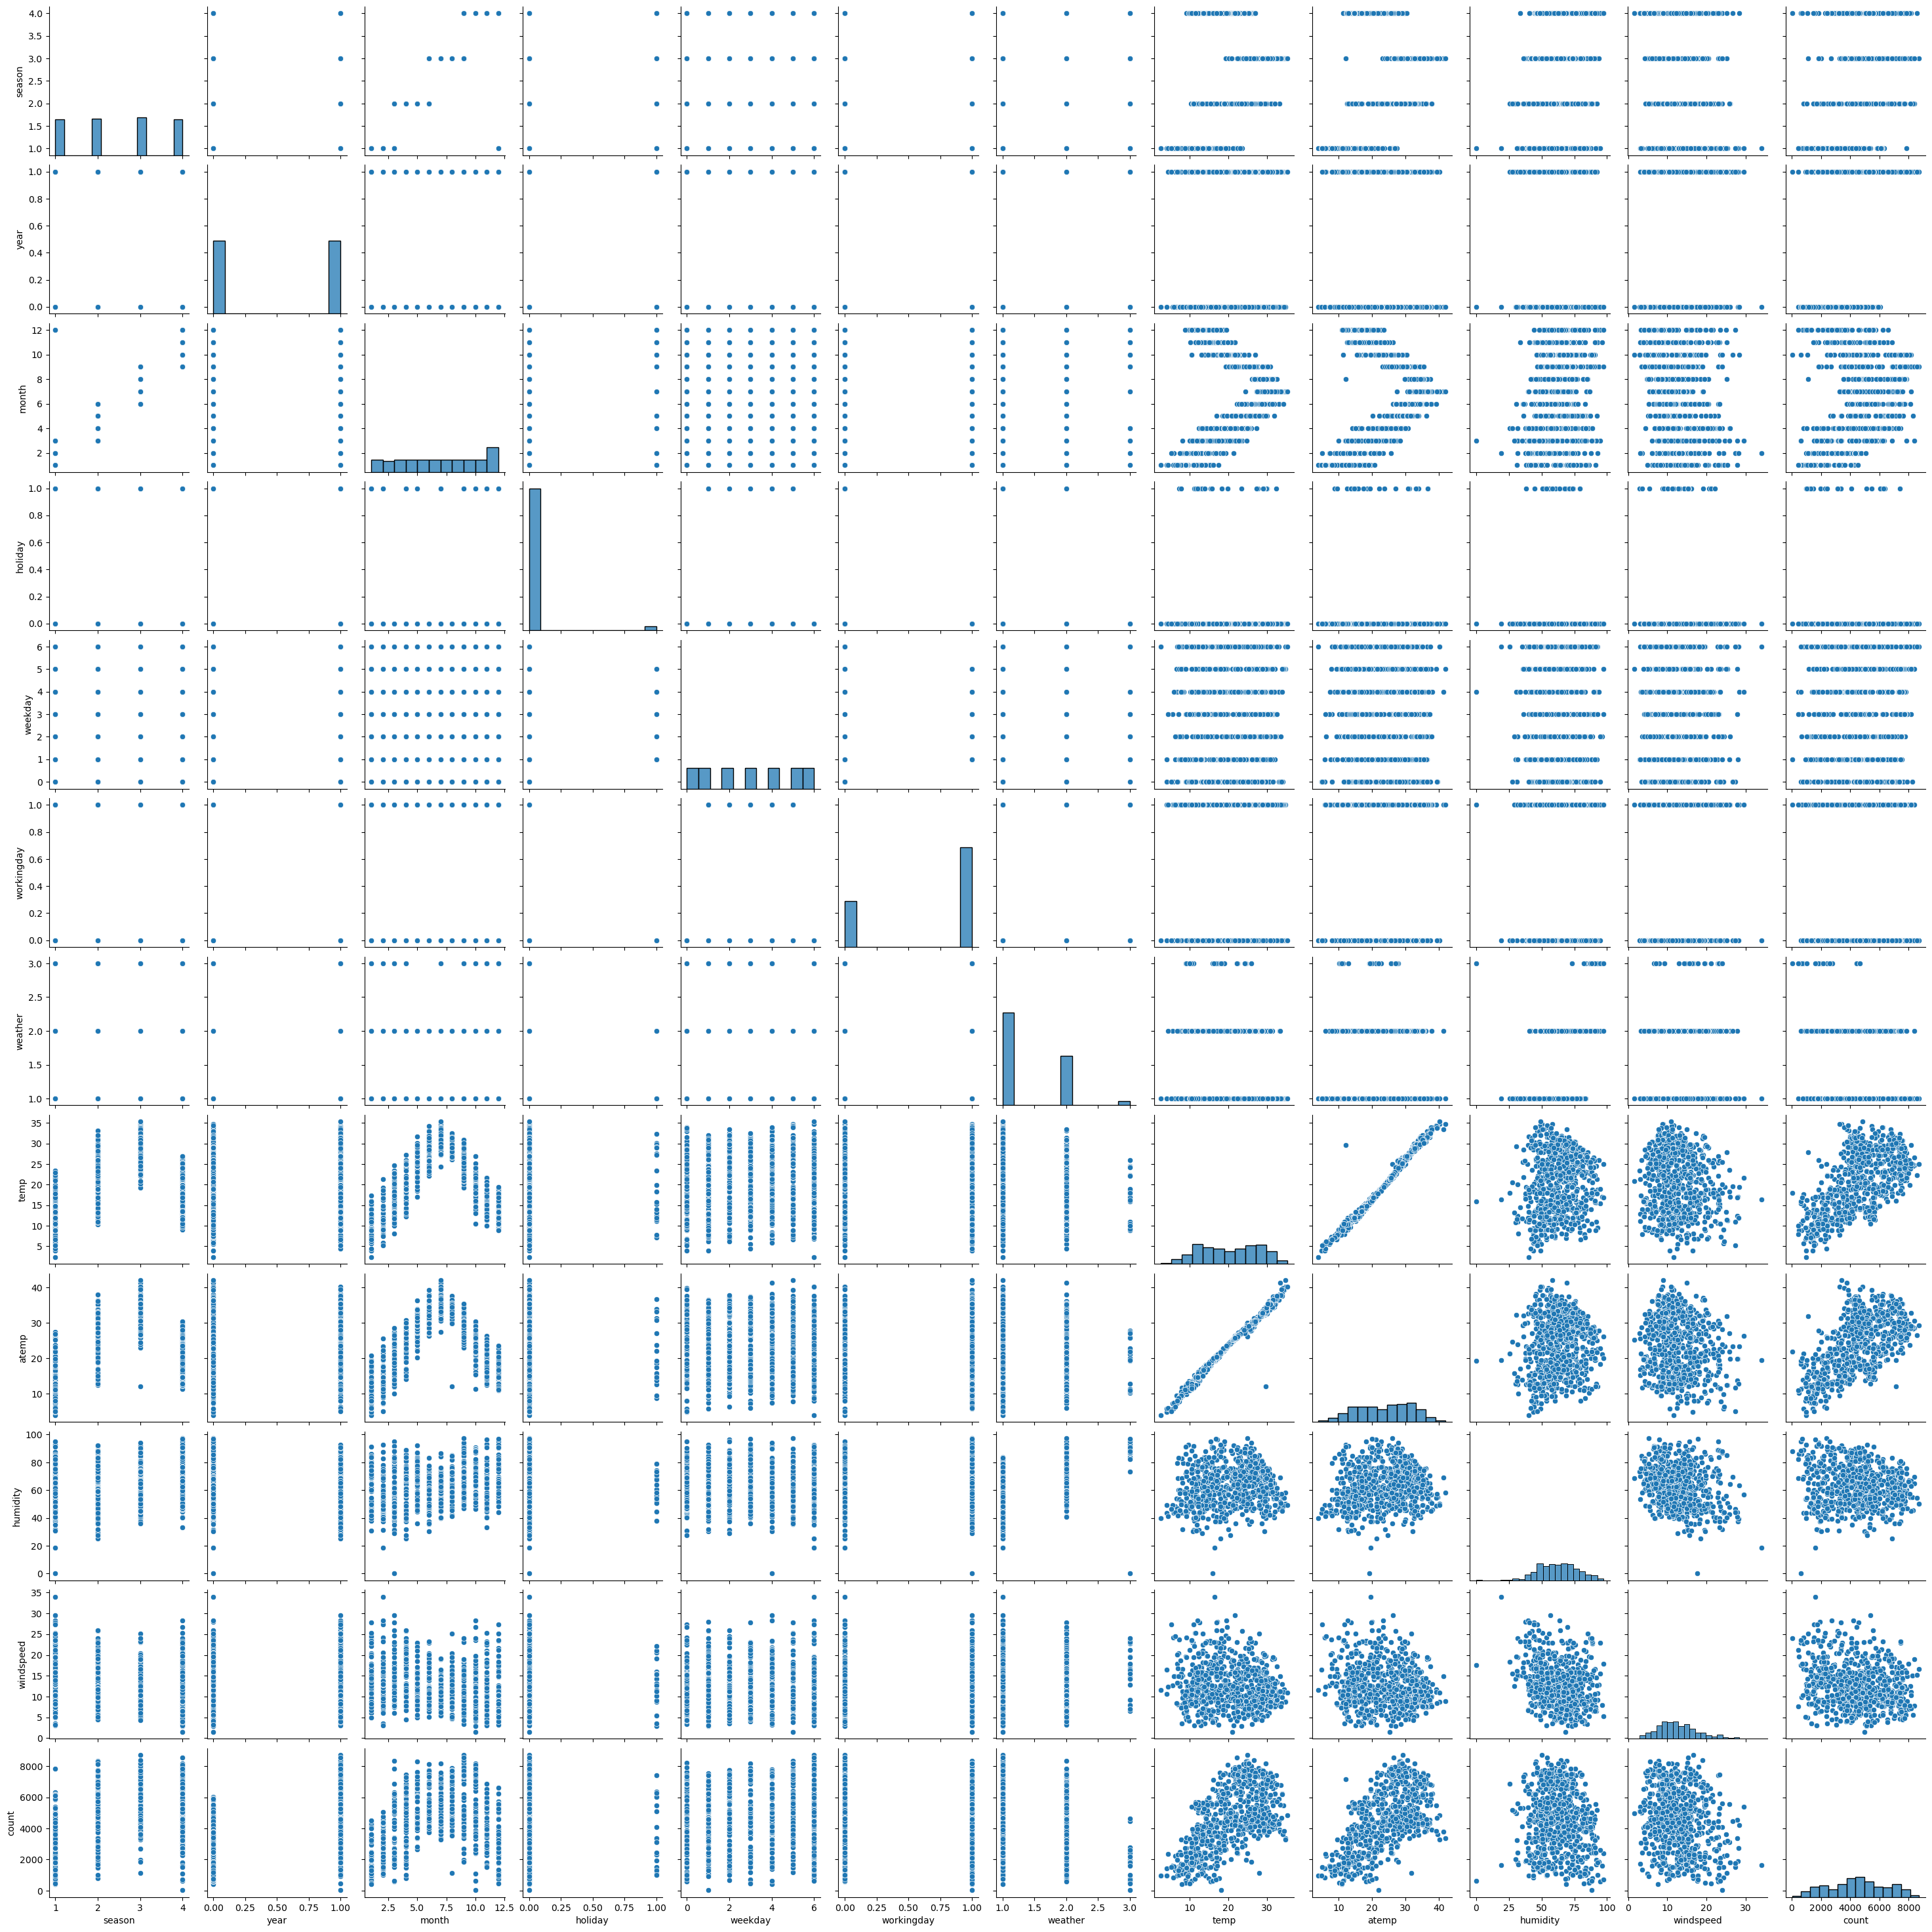

In [29]:
# Visualing/Understanding Data to see patterns 
# check multi-collinearity 
# libraries import
import matplotlib.pyplot as plt
import seaborn as sns

#lets check some relations 
#make a pairplot of all the numeric variables

sns.pairplot(data)
plt.show()

Observations from above pair plots : 
i) there is a good positive correlation between temp and count 
ii) there is a good positive correlation between atemp and count 
Hence this is a good candidate for multiple linear regression .

Collinearlity detected : 
There is strong correlation between temp and atemp.

Lets confirm this more with a heat map 

<Axes: >

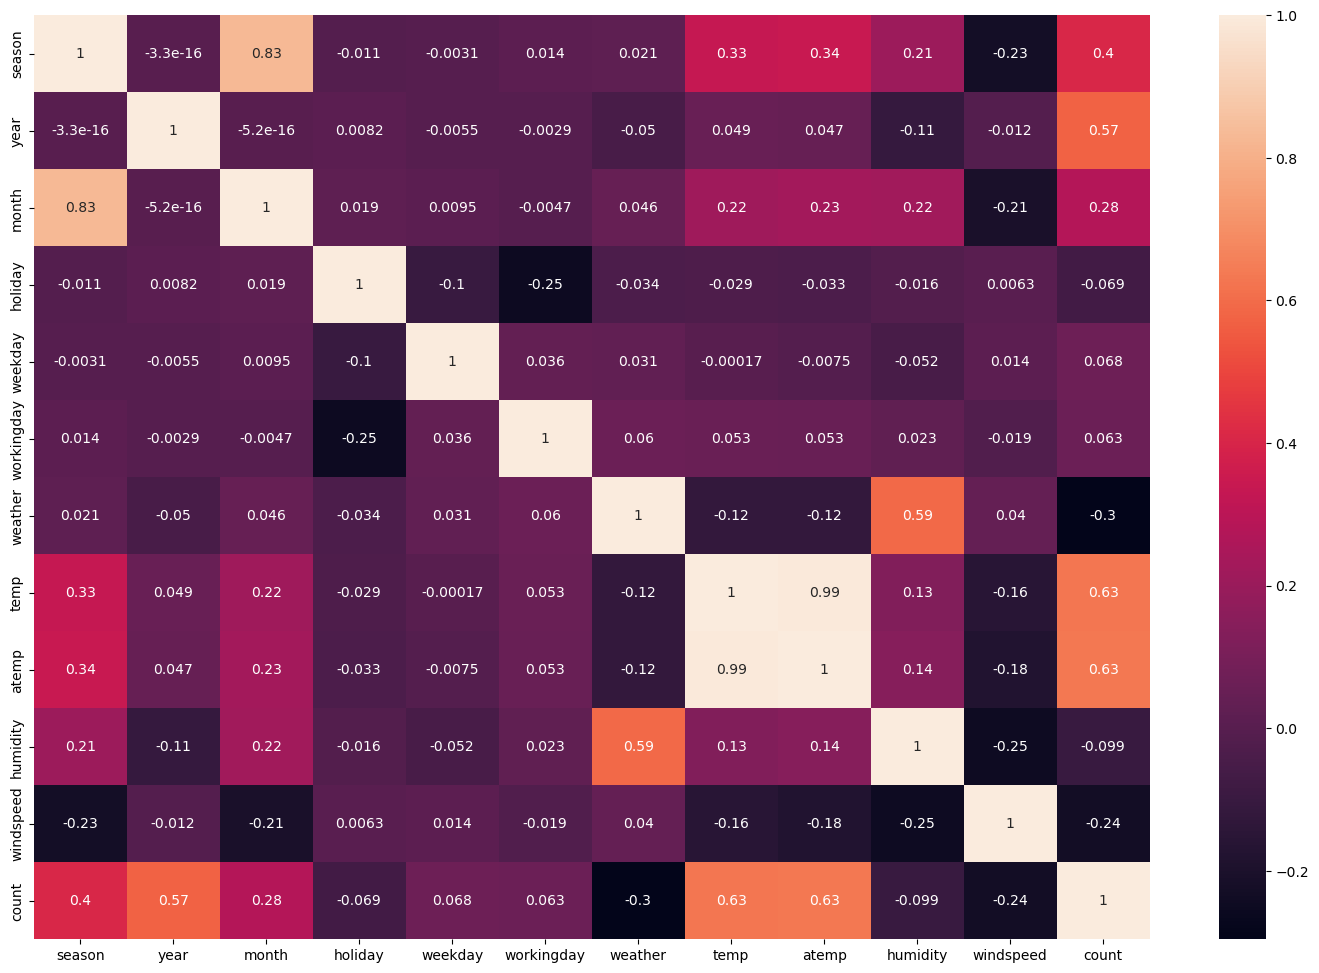

In [64]:
corr = data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot = True)

The findings are confirmed by heat map 
--> 0.63 between temp/atemp and count
--> 0.99 between temp/atemp

Lets check impact of categorical variables on the target variable !

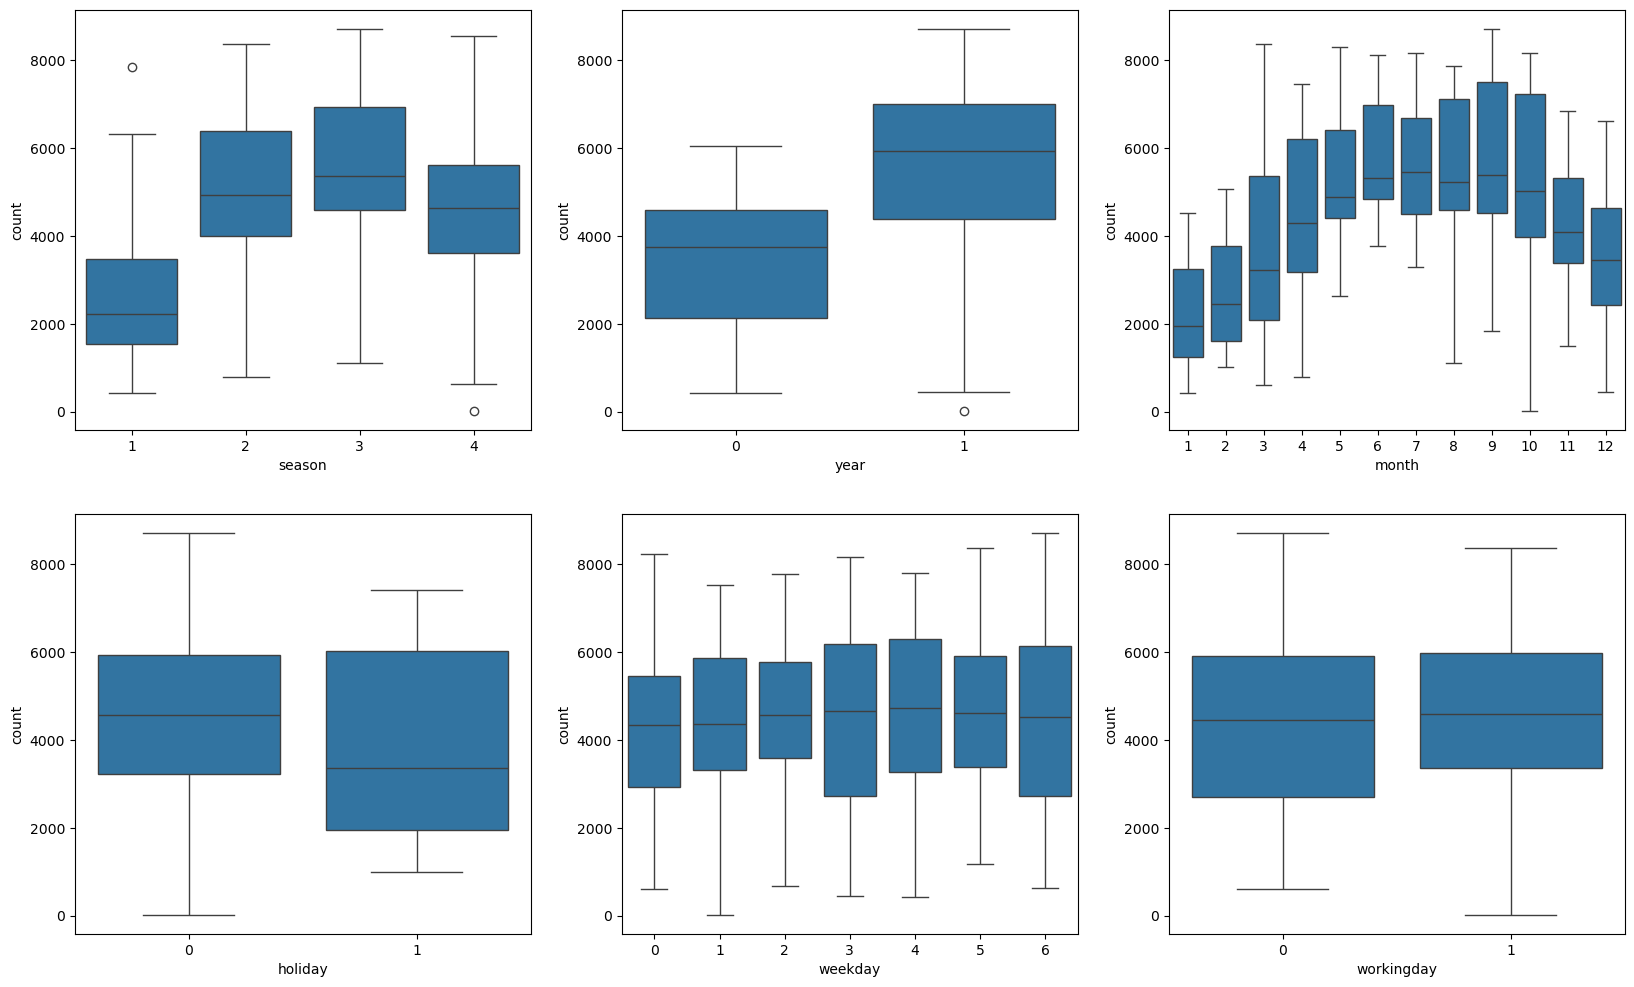

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = data)
plt.show()

## Findings on categorical variables : 
i)Season - Season 1 is low in performance , season 2 and 3 are similar
ii)Holiday -  There is significant difference in mean of holiday and non-holiday and non-holiday getting more counts also
iii)Weekday variable - The count remains stable across all days, with minor fluctuations
iv)Working day and non working day donot vary much except marginal increase for working day
v)Year- The latter year is definitely having more counts and showing increase in popularity as the organisation ages
vi)Month - Counts increase steadily from January to peak around July–September

<Axes: xlabel='weather', ylabel='count'>

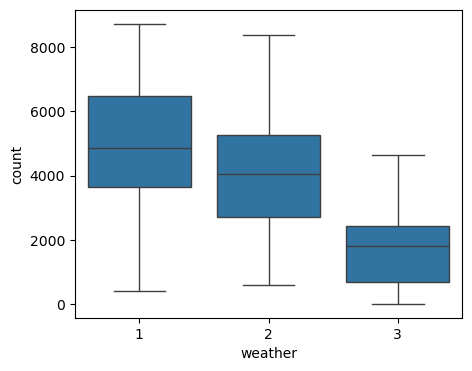

In [68]:
plt.figure(figsize=(5,4))
sns.boxplot(x = 'weather', y = 'count', data = data)


Analysis for weather :

As weather changes, the variability is prominent and consistent

In [ ]:
Moving to categorical variables --> Dummy variables :-
Lets first convert the ones with more than two values to back to their intended meanings 

In [21]:
# Define a mapping from numbers to season names
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Apply the mapping
data['season'] = data['season'].map(season_mapping)

data.head(5)


,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Apply the mapping using map
data['month_name'] = data['month'].map(month_mapping)
data.head(5)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,month_name
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,January
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,January
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,January
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,January
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,January


In [25]:
data.loc[ :,['workingday', 'weekday']].head(30)

,workingday,weekday
0,0,6
1,0,0
2,1,1
3,1,2
4,1,3
5,1,4
6,1,5
7,0,6
8,0,0
9,1,1


from the above data, one can see that 0 and 6 are weekends, now mapping values :

In [27]:
# Mapping function
def map_weekday(day):
    weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    return weekdays[day]

# Apply mapping to the 'weekday' column
data['weekday'] = data['weekday'].apply(map_weekday)
data.head(5)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,month_name
0,Spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,January
1,Spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,January
2,Spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,January
3,Spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,January
4,Spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,January


In [29]:
data.drop('month', axis = 1, inplace = True)
data = data.rename(columns={'month_name':'month'})
data.head(5)

,season,year,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,month
0,Spring,0,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985,January
1,Spring,0,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801,January
2,Spring,0,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349,January
3,Spring,0,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562,January
4,Spring,0,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600,January


In [31]:
# Mapping function for weather descriptions
def map_weather(code):
    weather_map = {
        1: "Clear Sky",
        2: "Cloudy Mist",
        3: "Rain Snow",
        4: "Heavy Rain"
    }
    return weather_map.get(code, "Unknown Weather")

# Apply mapping to the 'weather_code' column
data['weather'] = data['weather'].apply(map_weather)
data.head(5)

,season,year,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,month
0,Spring,0,0,Saturday,0,Cloudy Mist,14.110847,18.18125,80.5833,10.749882,985,January
1,Spring,0,0,Sunday,0,Cloudy Mist,14.902598,17.68695,69.6087,16.652113,801,January
2,Spring,0,0,Monday,1,Clear Sky,8.050924,9.47025,43.7273,16.636703,1349,January
3,Spring,0,0,Tuesday,1,Clear Sky,8.200000,10.60610,59.0435,10.739832,1562,January
4,Spring,0,0,Wednesday,1,Clear Sky,9.305237,11.46350,43.6957,12.522300,1600,January


Dummy Variables Creation Up Next !!

In [33]:
# List of columns to encode
columns_to_encode = ['month', 'weekday', 'weather', 'season']

# Loop through each column in the list
for col in columns_to_encode:
    # Generate dummy variables with drop_first=True to avoid multicollinearity
    status = pd.get_dummies(data[col], dtype = int, drop_first=True)
    
    # Concatenate the dummy variables to the original DataFrame
    data = pd.concat([data, status], axis=1)
    
    # Drop the original column
    data.drop([col], axis=1, inplace=True)

data.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy Mist,Rain Snow,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   count        730 non-null    int64  
 8   August       730 non-null    int32  
 9   December     730 non-null    int32  
 10  February     730 non-null    int32  
 11  January      730 non-null    int32  
 12  July         730 non-null    int32  
 13  June         730 non-null    int32  
 14  March        730 non-null    int32  
 15  May          730 non-null    int32  
 16  November     730 non-null    int32  
 17  October      730 non-null    int32  
 18  September    730 non-null    int32  
 19  Monday  

The data above looks all good with n-1 variables each for month, weekday, season and weather

Splitting data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#retaining train data for RFE 
df_train_rfe = df_train.copy()

Applying MinMax Scaling to scale the numeric features

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'count', 'humidity', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy Mist,Rain Snow,Spring,Summer,Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0


In [43]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy Mist,Rain Snow,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


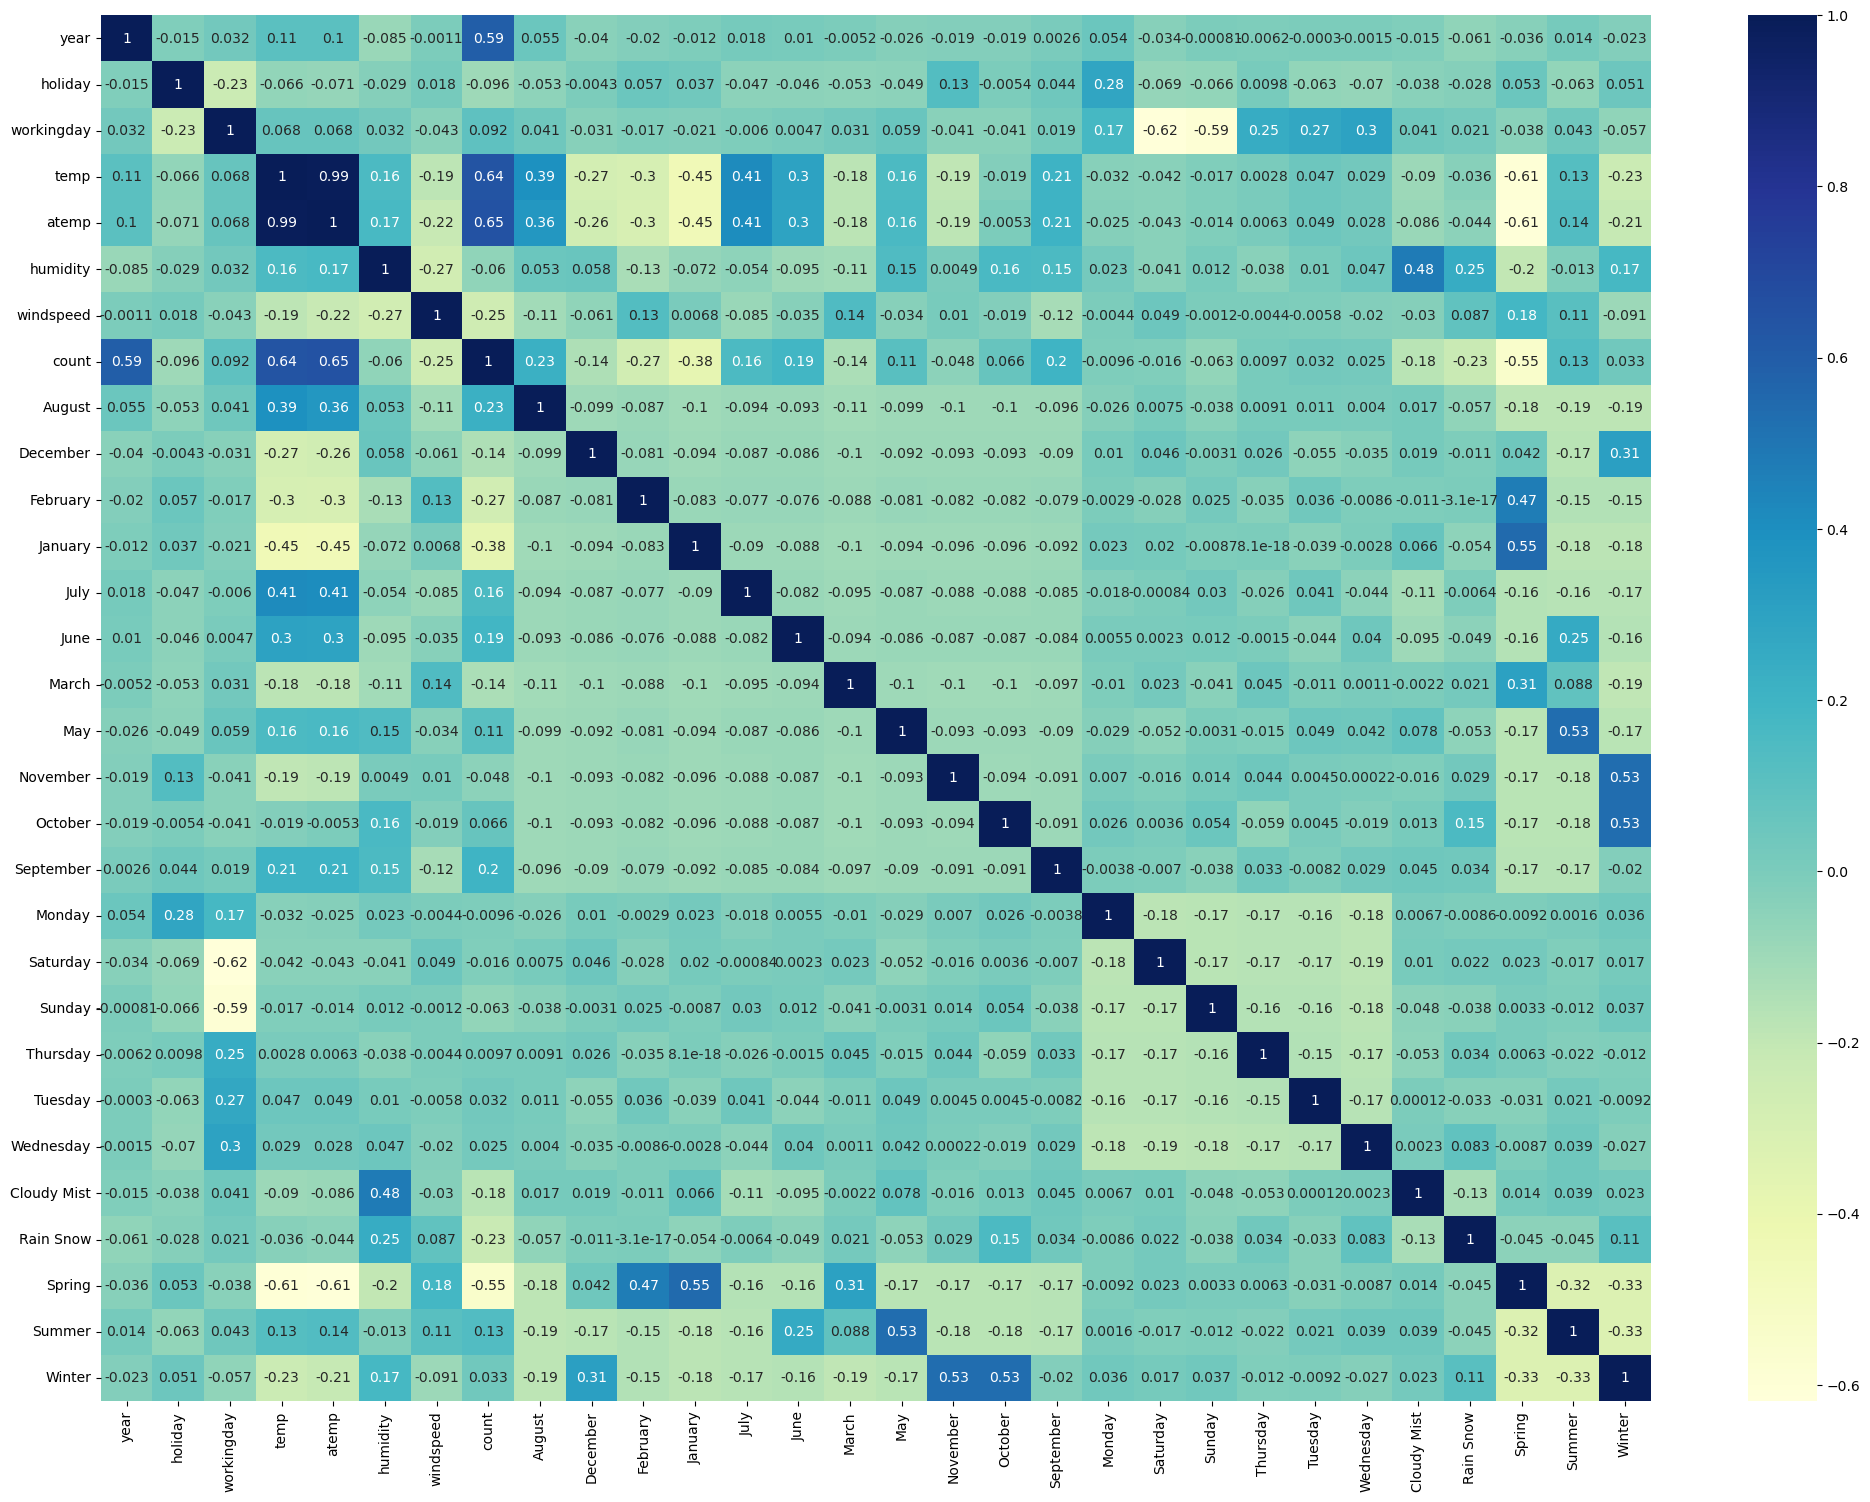

In [65]:

plt.figure(figsize = (25, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

earlier also, we had concluded temp/atemp has strong correlation with count . Here also we get to see that . Lets build model on atemp to start with . 

Dividing into X and Y sets for the model building

In [45]:
y_train = df_train.pop('count')
X_train = df_train

Lets go and use atemp for model fitting !!

In [47]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [48]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

In [51]:
X_train_lm.head(5)

,const,atemp
653,1.0,0.501133
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735


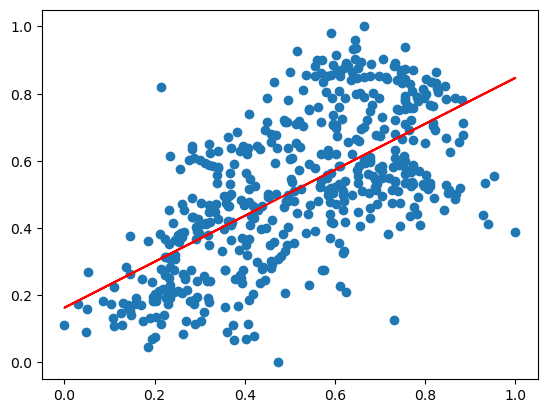

In [53]:
#plotting the best fit line provided by the model 
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [55]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.10e-61
Time:                        15:42:52   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

The R-squared obtained is good i.e. 0.418 with p value as zero for 'atemp'. Lets add the next best variable. We will not take 'temp' as it is highly correlated with existing feature 'atemp' and is good case for multicollinearity. After temp, it is 'year'. So building with same now as below : 

In [57]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'year']]

In [59]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
year     0.237817
dtype: float64

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.07e-131
Time:                        15:43:14   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

The value of R-Squared is very good 0.696 ~ 70% with p values 0 for both the features 'atemp' and 'year'


Now doing the RFE approach for automated version 

In [63]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy Mist',
       'Rain Snow', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [65]:
#Apply Min Max to data for RFE 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'count', 'humidity', 'windspeed']

df_train_rfe[num_vars] = scaler.fit_transform(df_train_rfe[num_vars])
df_train_rfe.head(5)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy Mist,Rain Snow,Spring,Summer,Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0


In [67]:
y_train = df_train_rfe.pop('count')
X_train_rfe = df_train_rfe

In [69]:
# y_train is already prepared and has one feature for the target only
#df_train will be used for X axis , already target is removed

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)


In [71]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Cloudy Mist', True, 1),
 ('Rain Snow', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [73]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'January', 'July', 'September', 'Saturday', 'Cloudy Mist', 'Rain Snow',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [75]:
X_train_rfe.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [77]:
X_train_rfe_m = X_train_rfe[col]

In [79]:
# Adding a constant variable 
import statsmodels.api as sm_rfe  
X_train_rfe_lm = sm_rfe.add_constant(X_train_rfe_m)

In [81]:
lm_rfe = sm_rfe.OLS(y_train,X_train_rfe_lm).fit()   # Running the linear model

In [83]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.31e-191
Time:                        15:44:44   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2510      0.036      6.949      

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_rfe = pd.DataFrame()
X = X_train_rfe_m
vif_rfe['Features'] = X.columns
vif_rfe['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_rfe['VIF'] = round(vif_rfe['VIF'], 2)
vif_rfe = vif_rfe.sort_values(by = "VIF", ascending = False)
vif_rfe

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.48
13,Summer,2.84
10,Cloudy Mist,2.29
0,year,2.09
9,Saturday,1.98


In [87]:
import statsmodels.tools.tools as sm_tools


# lm_rfe is the fitted model, and vif is the VIF DataFrame or Series for all features

# Get p-values from the model (including the index, which is the feature names)
p_values = lm_rfe.pvalues
p_value_features = p_values.index  # Feature names (index)
p_value_values = p_values.values  # P-value values

# 'vif_rfe' is a DataFrame or Series containing VIF values for each feature

vif_features = vif_rfe['Features']  # Feature names (index)
vif_values = vif_rfe['VIF']

# Define thresholds for high and low p-value and VIF
p_value_threshold = 0.05  # Common threshold for p-value
vif_threshold = 5  # Common threshold for VIF

# Create DataFrames for both p-values and VIFs
p_values_df = pd.DataFrame({
    'Feature': p_value_features,
    'P-Value': p_value_values
})

vif_df = pd.DataFrame({
    'Feature': vif_features,
    'VIF': vif_values
})
pd.options.display.float_format = '{:.3f}'.format

# Merge the two DataFrames on the 'Feature' column
classification_df = pd.merge(p_values_df, vif_df, on='Feature', how='inner')
classification_df.head(5)

# Classify features into the four categories based on the thresholds
def classify(row):
    if row['P-Value'] > p_value_threshold and row['VIF'] > vif_threshold:
        return 'High P-value and High VIF'
    elif row['P-Value'] > p_value_threshold and row['VIF'] <= vif_threshold:
        return 'High P-value and Low VIF'
    elif row['P-Value'] <= p_value_threshold and row['VIF'] > vif_threshold:
        return 'Low P-value and High VIF'
    else:
        return 'Low P-value and Low VIF'

# Apply classification function to each row
classification_df['Category'] = classification_df.apply(classify, axis=1)

# Reorder the columns for better readability
classification_df = classification_df[['Feature', 'P-Value', 'VIF', 'Category']]

# Display the final DataFrame
classification_df.sort_values(by='Category', ascending=False, inplace=True)
print(classification_df)


        Feature  P-Value    VIF                  Category
0          year    0.000  2.090   Low P-value and Low VIF
1       holiday    0.030  1.180   Low P-value and Low VIF
5     windspeed    0.000  4.730   Low P-value and Low VIF
6       January    0.048  1.670   Low P-value and Low VIF
7          July    0.003  1.590   Low P-value and Low VIF
8     September    0.000  1.390   Low P-value and Low VIF
9      Saturday    0.000  1.980   Low P-value and Low VIF
10  Cloudy Mist    0.000  2.290   Low P-value and Low VIF
11    Rain Snow    0.000  1.250   Low P-value and Low VIF
12       Spring    0.014  4.530   Low P-value and Low VIF
13       Summer    0.001  2.840   Low P-value and Low VIF
14       Winter    0.000  3.480   Low P-value and Low VIF
2    workingday    0.000  5.310  Low P-value and High VIF
3          temp    0.000 17.770  Low P-value and High VIF
4      humidity    0.000 29.400  Low P-value and High VIF


REMOVING HUMIDITY and building model again 

In [90]:
X_train_rfe_m.drop('humidity', axis = 1, inplace = True )

X_train_rfe_lm = sm_rfe.add_constant(X_train_rfe_m)

lm_rfe = sm_rfe.OLS(y_train,X_train_rfe_lm).fit()   # Running the linear model

print(lm_rfe.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          7.33e-189
Time:                        15:44:51   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1737      0.031      5.525      

In [92]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_rfe = pd.DataFrame()
X = X_train_rfe_m
vif_rfe['Features'] = X.columns
vif_rfe['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_rfe['VIF'] = round(vif_rfe['VIF'], 2)
vif_rfe = vif_rfe.sort_values(by = "VIF", ascending = False)
vif_rfe

,Features,VIF
3,temp,7.070
2,workingday,5.240
4,windspeed,4.670
11,Spring,3.080
12,Summer,2.330
0,year,2.080
13,Winter,1.990
8,Saturday,1.970
5,January,1.620
6,July,1.590


In [94]:
import statsmodels.tools.tools as sm_tools


# lm_rfe is the fitted model, and vif is the VIF DataFrame or Series for all features

# Get p-values from the model (including the index, which is the feature names)
p_values = lm_rfe.pvalues
p_value_features = p_values.index  # Feature names (index)
p_value_values = p_values.values  # P-value values

# 'vif_rfe' is a DataFrame or Series containing VIF values for each feature

vif_features = vif_rfe['Features']  # Feature names (index)
vif_values = vif_rfe['VIF']

# Define thresholds for high and low p-value and VIF
p_value_threshold = 0.05  # Common threshold for p-value
vif_threshold = 5  # Common threshold for VIF

# Create DataFrames for both p-values and VIFs
p_values_df = pd.DataFrame({
    'Feature': p_value_features,
    'P-Value': p_value_values
})

vif_df = pd.DataFrame({
    'Feature': vif_features,
    'VIF': vif_values
})
pd.options.display.float_format = '{:.3f}'.format

# Merge the two DataFrames on the 'Feature' column
classification_df = pd.merge(p_values_df, vif_df, on='Feature', how='inner')
classification_df.head(5)

# Classify features into the four categories based on the thresholds
def classify(row):
    if row['P-Value'] > p_value_threshold and row['VIF'] > vif_threshold:
        return 'High P-value and High VIF'
    elif row['P-Value'] > p_value_threshold and row['VIF'] <= vif_threshold:
        return 'High P-value and Low VIF'
    elif row['P-Value'] <= p_value_threshold and row['VIF'] > vif_threshold:
        return 'Low P-value and High VIF'
    else:
        return 'Low P-value and Low VIF'

# Apply classification function to each row
classification_df['Category'] = classification_df.apply(classify, axis=1)

# Reorder the columns for better readability
classification_df = classification_df[['Feature', 'P-Value', 'VIF', 'Category']]

# Display the final DataFrame
classification_df.sort_values(by='Category', ascending=False, inplace=True)
print(classification_df)


        Feature  P-Value   VIF                  Category
0          year    0.000 2.080   Low P-value and Low VIF
1       holiday    0.040 1.170   Low P-value and Low VIF
4     windspeed    0.000 4.670   Low P-value and Low VIF
5       January    0.027 1.620   Low P-value and Low VIF
6          July    0.009 1.590   Low P-value and Low VIF
7     September    0.000 1.350   Low P-value and Low VIF
8      Saturday    0.000 1.970   Low P-value and Low VIF
9   Cloudy Mist    0.000 1.570   Low P-value and Low VIF
10    Rain Snow    0.000 1.090   Low P-value and Low VIF
11       Spring    0.004 3.080   Low P-value and Low VIF
12       Summer    0.004 2.330   Low P-value and Low VIF
13       Winter    0.000 1.990   Low P-value and Low VIF
2    workingday    0.000 5.240  Low P-value and High VIF
3          temp    0.000 7.070  Low P-value and High VIF


In [96]:
#removing workingday 
X_train_rfe_m.drop('workingday', axis = 1, inplace = True )

import statsmodels.api as sm_rfe  
X_train_rfe_lm = sm_rfe.add_constant(X_train_rfe_m)

lm_rfe = sm_rfe.OLS(y_train,X_train_rfe_lm).fit()   # Running the linear model

print(lm_rfe.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          1.21e-186
Time:                        15:44:58   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2121      0.030      6.986      

In [98]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_rfe = pd.DataFrame()
X = X_train_rfe_m
vif_rfe['Features'] = X.columns
vif_rfe['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_rfe['VIF'] = round(vif_rfe['VIF'], 2)
vif_rfe = vif_rfe.sort_values(by = "VIF", ascending = False)
vif_rfe

,Features,VIF
2,temp,5.160
3,windspeed,4.640
10,Spring,2.760
11,Summer,2.230
0,year,2.070
12,Winter,1.800
4,January,1.610
5,July,1.590
8,Cloudy Mist,1.560
6,September,1.340


In [102]:
import statsmodels.tools.tools as sm_tools


# lm_rfe is the fitted model, and vif is the VIF DataFrame or Series for all features

# Get p-values from the model (including the index, which is the feature names)
p_values = lm_rfe.pvalues
p_value_features = p_values.index  # Feature names (index)
p_value_values = p_values.values  # P-value values

# 'vif_rfe' is a DataFrame or Series containing VIF values for each feature

vif_features = vif_rfe['Features']  # Feature names (index)
vif_values = vif_rfe['VIF']

# Define thresholds for high and low p-value and VIF
p_value_threshold = 0.05  # Common threshold for p-value
vif_threshold = 5  # Common threshold for VIF

# Create DataFrames for both p-values and VIFs
p_values_df = pd.DataFrame({
    'Feature': p_value_features,
    'P-Value': p_value_values
})

vif_df = pd.DataFrame({
    'Feature': vif_features,
    'VIF': vif_values
})
pd.options.display.float_format = '{:.3f}'.format

# Merge the two DataFrames on the 'Feature' column
classification_df = pd.merge(p_values_df, vif_df, on='Feature', how='inner')
classification_df.head(5)

# Classify features into the four categories based on the thresholds
def classify(row):
    if row['P-Value'] > p_value_threshold and row['VIF'] > vif_threshold:
        return 'High P-value and High VIF'
    elif row['P-Value'] > p_value_threshold and row['VIF'] <= vif_threshold:
        return 'High P-value and Low VIF'
    elif row['P-Value'] <= p_value_threshold and row['VIF'] > vif_threshold:
        return 'Low P-value and High VIF'
    else:
        return 'Low P-value and Low VIF'

# Apply classification function to each row
classification_df['Category'] = classification_df.apply(classify, axis=1)

# Reorder the columns for better readability
classification_df = classification_df[['Feature', 'P-Value', 'VIF', 'Category']]

# Display the final DataFrame
classification_df.sort_values(by='Category', ascending=False, inplace=True)
print(classification_df)

        Feature  P-Value   VIF                  Category
0          year    0.000 2.070   Low P-value and Low VIF
1       holiday    0.000 1.050   Low P-value and Low VIF
3     windspeed    0.000 4.640   Low P-value and Low VIF
4       January    0.032 1.610   Low P-value and Low VIF
5          July    0.006 1.590   Low P-value and Low VIF
6     September    0.000 1.340   Low P-value and Low VIF
8   Cloudy Mist    0.000 1.560   Low P-value and Low VIF
9     Rain Snow    0.000 1.080   Low P-value and Low VIF
10       Spring    0.004 2.760   Low P-value and Low VIF
11       Summer    0.005 2.230   Low P-value and Low VIF
12       Winter    0.000 1.800   Low P-value and Low VIF
2          temp    0.000 5.160  Low P-value and High VIF
7      Saturday    0.074 1.190  High P-value and Low VIF


As with the manual analysis , atemp was the most important parameter, 'temp' was most closely related to 'atemp', so we decide to retain temp
Moving ahead with Residual analysis

In [104]:
y_train_count = lm_rfe.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

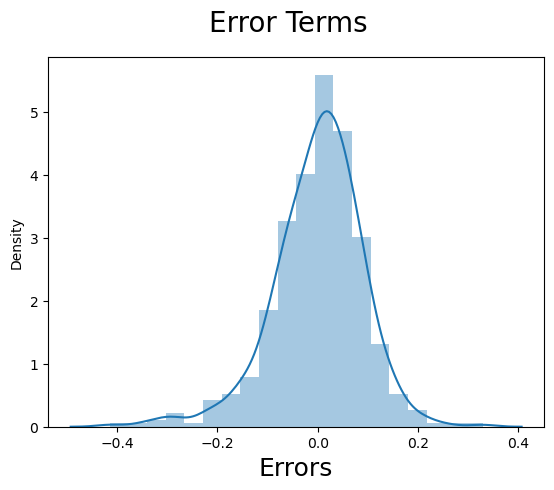

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

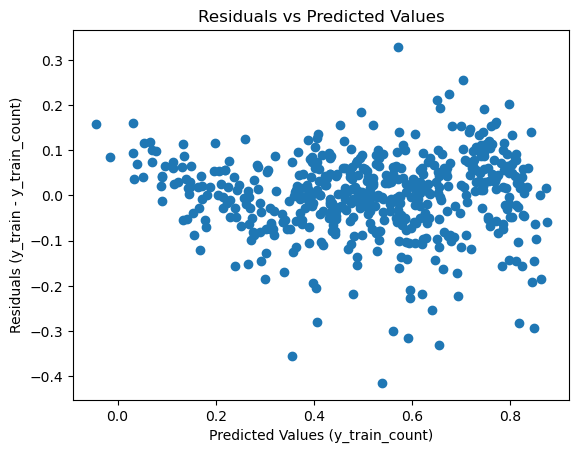

In [130]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_train - y_train_count

# Plot residuals against predicted values
plt.scatter(y_train_count, residuals)
#plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (y_train_count)')
plt.ylabel('Residuals (y_train - y_train_count)')
plt.title('Residuals vs Predicted Values')
plt.show()


In [108]:
#Now lets move to Test Data !!
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [110]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Cloudy Mist', 'Rain Snow', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [112]:
y_test = df_test.pop('count')
X_test = df_test

In [114]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_m.columns]

# Adding a constant variable 
X_test_new = sm_rfe.add_constant(X_test_new)

In [116]:
# Making predictions
y_pred = lm_rfe.predict(X_test_new)

In [122]:
#evalute the established model 
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.8026272806396589

Text(0, 0.5, 'y_pred')

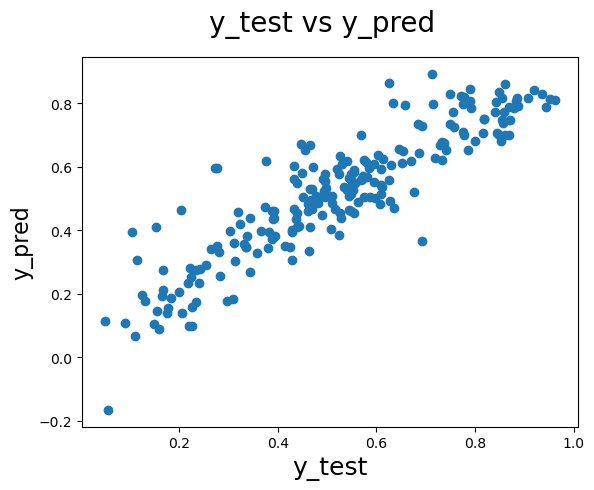

In [126]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label